In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
cust_demo = pd.read_excel('/content/Raw_data.xlsx', sheet_name='CustomerDemographic')
cust_demo.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [3]:
cust_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   first_name                           4000 non-null   object 
 2   last_name                            3875 non-null   object 
 3   gender                               4000 non-null   object 
 4   past_3_years_bike_related_purchases  4000 non-null   int64  
 5   DOB                                  3913 non-null   object 
 6   job_title                            3494 non-null   object 
 7   job_industry_category                3344 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  default                              3698 non-null   object 
 11  owns_car                      

In [4]:
cust_demo.isnull().sum()

,0
customer_id,0
first_name,0
last_name,125
gender,0
past_3_years_bike_related_purchases,0
DOB,87
job_title,506
job_industry_category,656
wealth_segment,0
deceased_indicator,0


In [5]:
cust_demo.drop('default', axis = 1 , inplace = True)

In [6]:
cust_demo.columns = cust_demo.columns.str.lower()

In [7]:
cust_demo.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'dob', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure'],
      dtype='object')

In [8]:
cust_demo['last_name'].fillna('missing' , inplace = True)

In [9]:
cust_demo.isna().sum()

,0
customer_id,0
first_name,0
last_name,0
gender,0
past_3_years_bike_related_purchases,0
dob,87
job_title,506
job_industry_category,656
wealth_segment,0
deceased_indicator,0


In [10]:
cust_demo[cust_demo['dob'].isna()]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,dob,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
143,144,Jory,Barrabeale,U,71,NaN,Environmental Tech,IT,Mass Customer,N,No,NaN
167,168,Reggie,Broggetti,U,8,NaN,General Manager,IT,Affluent Customer,N,Yes,NaN
266,267,Edgar,Buckler,U,53,NaN,NaN,IT,High Net Worth,N,No,NaN
289,290,Giorgio,Kevane,U,42,NaN,Senior Sales Associate,IT,Mass Customer,N,No,NaN
450,451,Marlow,Flowerdew,U,37,NaN,Quality Control Specialist,IT,High Net Worth,N,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3778,3779,Ulick,Daspar,U,68,NaN,NaN,IT,Affluent Customer,N,No,NaN
3882,3883,Nissa,Conrad,U,35,NaN,Legal Assistant,IT,Mass Customer,N,No,NaN
3930,3931,Kylie,Epine,U,19,NaN,NaN,IT,High Net Worth,N,Yes,NaN
3934,3935,Teodor,Alfonsini,U,72,NaN,NaN,IT,High Net Worth,N,Yes,NaN


In [11]:
cust_demo[cust_demo['dob'].isna()].index

Index([ 143,  167,  266,  289,  450,  452,  453,  479,  512,  525,  547,  581,
        598,  679,  684,  798,  838,  882,  891,  949,  974,  982,  995, 1037,
       1043, 1081, 1173, 1209, 1243, 1350, 1476, 1508, 1582, 1627, 1682, 1739,
       1772, 1779, 1805, 1917, 1937, 1989, 1999, 2020, 2068, 2164, 2204, 2251,
       2294, 2334, 2340, 2413, 2425, 2468, 2539, 2641, 2646, 2695, 2696, 2853,
       2919, 2962, 2998, 3011, 3085, 3150, 3221, 3222, 3254, 3287, 3297, 3311,
       3321, 3342, 3364, 3472, 3509, 3512, 3564, 3653, 3717, 3726, 3778, 3882,
       3930, 3934, 3997],
      dtype='int64')

In [12]:
cust_demo.drop(cust_demo[cust_demo['dob'].isna()].index , inplace = True)

In [13]:
cust_demo.isna().sum()

,0
customer_id,0
first_name,0
last_name,0
gender,0
past_3_years_bike_related_purchases,0
dob,0
job_title,497
job_industry_category,656
wealth_segment,0
deceased_indicator,0


In [14]:
cust_demo['dob'] = pd.to_datetime(cust_demo['dob'])

In [15]:
cust_demo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3913 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3913 non-null   int64         
 1   first_name                           3913 non-null   object        
 2   last_name                            3913 non-null   object        
 3   gender                               3913 non-null   object        
 4   past_3_years_bike_related_purchases  3913 non-null   int64         
 5   dob                                  3913 non-null   datetime64[ns]
 6   job_title                            3416 non-null   object        
 7   job_industry_category                3257 non-null   object        
 8   wealth_segment                       3913 non-null   object        
 9   deceased_indicator                   3913 non-null   object        
 10  owns_car         

In [16]:
cust_demo['job_title'].fillna('missing', inplace = True)
cust_demo['job_industry_category'].fillna('missing', inplace = True)

In [17]:
cust_demo.isna().sum()

,0
customer_id,0
first_name,0
last_name,0
gender,0
past_3_years_bike_related_purchases,0
dob,0
job_title,0
job_industry_category,0
wealth_segment,0
deceased_indicator,0


In [18]:
from datetime import datetime, date
def age(dob):
  today = date.today()
  return today.year - dob.year


In [19]:
cust_demo['age'] = cust_demo['dob'].apply(age)

In [20]:
cust_demo.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,dob,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,72
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,45
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,71
3,4,Talbot,missing,Male,33,1961-10-03,missing,IT,Mass Customer,N,No,7.0,64
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,missing,Affluent Customer,N,Yes,8.0,48


<Axes: xlabel='age', ylabel='Count'>

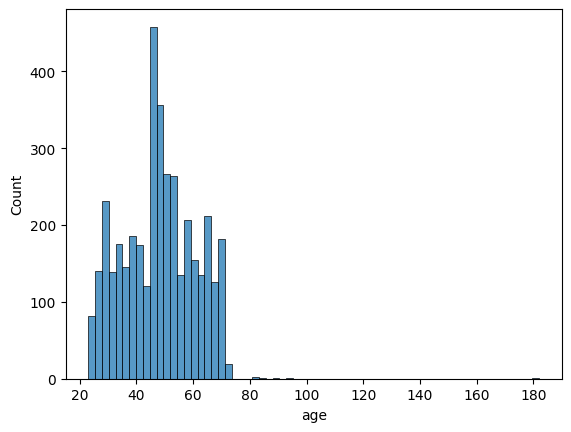

In [21]:
sns.histplot(cust_demo['age'])

In [22]:
cust_demo['age'].describe()

,age
count,3913.000000
mean,47.969333
std,12.796387
min,23.000000
25%,38.000000
50%,48.000000
75%,57.000000
max,182.000000


In [23]:
cust_demo[cust_demo['age'] > 100]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,dob,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age
33,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,No,20.0,182


In [24]:
cust_demo.drop(cust_demo[cust_demo['age'] > 100].index , inplace = True)

In [25]:
cust_demo['age'].describe()

,age
count,3912.000000
mean,47.935072
std,12.617249
min,23.000000
25%,38.000000
50%,48.000000
75%,57.000000
max,94.000000


In [26]:
cust_demo.describe(include = 'object')

,first_name,last_name,gender,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car
count,3912,3912,3912,3912,3912,3912,3912,3912
unique,3078,3647,5,196,10,3,2,2
top,Tobe,missing,Female,missing,Manufacturing,Mass Customer,N,Yes
freq,5,121,2037,497,796,1954,3910,1974


In [27]:
cust_demo['owns_car'].value_counts()

,count
owns_car,
Yes,1974
No,1938


In [28]:
cust_demo['deceased_indicator'].value_counts()

,count
deceased_indicator,
N,3910
Y,2


In [29]:
cust_demo['wealth_segment'].value_counts()

,count
wealth_segment,
Mass Customer,1954
High Net Worth,996
Affluent Customer,962


In [30]:
cust_demo['gender'].value_counts()

,count
gender,
Female,2037
Male,1872
F,1
Femal,1
M,1


In [31]:
def correct_gender(gender):
  if gender == 'F':
    return 'Female'
  elif gender == 'Femal':
    return 'Female'
  elif gender == 'M':
    return 'Male'
  else:
    return gender


In [32]:
cust_demo['gender'] = cust_demo['gender'].apply(correct_gender)

In [33]:
cust_demo['gender'].value_counts()

,count
gender,
Female,2039
Male,1873


In [34]:
cust_demo.duplicated().sum()

0

In [35]:
cust_demo.to_csv('cust_demo_cleaned.csv', index = False)

In [36]:
cust_add = pd.read_excel('/content/Raw_data.xlsx', sheet_name='CustomerAddress')
cust_add.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [37]:
cust_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [38]:
cust_add.isnull().sum()

,0
customer_id,0
address,0
postcode,0
state,0
country,0
property_valuation,0


In [39]:
cust_add['country'].value_counts()

,count
country,
Australia,3999


In [40]:
cust_add['state'].value_counts()

,count
state,
NSW,2054
VIC,939
QLD,838
New South Wales,86
Victoria,82


In [41]:
def correct_state(state):
  if state == 'New South Wales':
    return 'NSW'
  elif state == 'Victoria':
    return 'VIC'
  else:
    return state

In [42]:
cust_add['state'] = cust_add['state'].apply(correct_state)

In [43]:
cust_add['state'].value_counts()

,count
state,
NSW,2140
VIC,1021
QLD,838


In [44]:
cust_add.duplicated().sum()

0

In [45]:
cust_add.to_csv('cust_add_cleaned.csv', index = False)

In [46]:
transaction = pd.read_excel('/content/Raw_data.xlsx', sheet_name='Transactions')
transaction.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [47]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [48]:
transaction.drop('product_first_sold_date', axis = 1 , inplace= True)

In [49]:
transaction.isnull().sum()

,0
transaction_id,0
product_id,0
customer_id,0
transaction_date,0
online_order,360
order_status,0
brand,197
product_line,197
product_class,197
product_size,197


In [50]:
transaction['online_order'].value_counts()

,count
online_order,
1.0,9829
0.0,9811


In [51]:
transaction['online_order'].fillna(transaction['online_order'].mode()[0], inplace= True)

In [52]:
transaction.isnull().sum()

,0
transaction_id,0
product_id,0
customer_id,0
transaction_date,0
online_order,0
order_status,0
brand,197
product_line,197
product_class,197
product_size,197


In [53]:
transaction[transaction['brand'].isna()]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost
136,137,0,431,2017-09-23,0.0,Approved,NaN,NaN,NaN,NaN,1942.61,NaN
159,160,0,3300,2017-08-27,0.0,Approved,NaN,NaN,NaN,NaN,1656.86,NaN
366,367,0,1614,2017-03-10,0.0,Approved,NaN,NaN,NaN,NaN,850.89,NaN
406,407,0,2559,2017-06-14,1.0,Approved,NaN,NaN,NaN,NaN,710.59,NaN
676,677,0,2609,2017-07-02,0.0,Approved,NaN,NaN,NaN,NaN,1972.01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
19340,19341,0,443,2017-12-26,1.0,Approved,NaN,NaN,NaN,NaN,744.54,NaN
19383,19384,0,2407,2017-06-11,0.0,Approved,NaN,NaN,NaN,NaN,1098.18,NaN
19793,19794,0,2860,2017-01-13,0.0,Approved,NaN,NaN,NaN,NaN,868.56,NaN
19859,19860,0,2468,2017-06-24,1.0,Approved,NaN,NaN,NaN,NaN,1497.43,NaN


In [54]:
transaction[transaction['brand'].isna()].index

Index([  136,   159,   366,   406,   676,   780,  1003,  1130,  1196,  1282,
       ...
       19045, 19132, 19176, 19196, 19205, 19340, 19383, 19793, 19859, 19871],
      dtype='int64', length=197)

In [55]:
transaction.drop(transaction[transaction['brand'].isna()].index , inplace = True)

In [56]:
transaction.isnull().sum()

,0
transaction_id,0
product_id,0
customer_id,0
transaction_date,0
online_order,0
order_status,0
brand,0
product_line,0
product_class,0
product_size,0


In [57]:
transaction['profit'] = transaction['list_price'] - transaction['standard_cost']

In [58]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19803 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    19803 non-null  int64         
 1   product_id        19803 non-null  int64         
 2   customer_id       19803 non-null  int64         
 3   transaction_date  19803 non-null  datetime64[ns]
 4   online_order      19803 non-null  float64       
 5   order_status      19803 non-null  object        
 6   brand             19803 non-null  object        
 7   product_line      19803 non-null  object        
 8   product_class     19803 non-null  object        
 9   product_size      19803 non-null  object        
 10  list_price        19803 non-null  float64       
 11  standard_cost     19803 non-null  float64       
 12  profit            19803 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 2.1+ MB


In [60]:
transaction.duplicated().sum()

0

In [59]:
transaction.to_csv('transaction_cleaned.csv', index = False)

In [61]:
df = pd.merge(transaction, cust_demo, on = 'customer_id' , how = 'inner')
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,gender,past_3_years_bike_related_purchases,dob,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,70
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,Female,89,1979-02-04,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,46
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,...,Male,9,1977-06-03,Desktop Support Technician,Retail,Affluent Customer,N,No,22.0,48
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,...,Male,83,1962-01-14,Staff Scientist,Financial Services,Mass Customer,N,No,16.0,63
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,...,Female,29,1996-12-15,missing,Retail,Affluent Customer,N,Yes,2.0,29


In [69]:
df[df['customer_id'] == 1]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,gender,past_3_years_bike_related_purchases,dob,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age
90,94,86,1,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,...,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,72
3649,3765,38,1,2017-04-06,1.0,Approved,Solex,Standard,medium,medium,...,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,72
4996,5157,47,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,...,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,72
9478,9785,72,1,2017-01-05,0.0,Approved,Norco Bicycles,Standard,medium,medium,...,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,72
12998,13424,2,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,...,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,72
13213,13644,25,1,2017-05-19,0.0,Approved,Giant Bicycles,Road,medium,medium,...,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,72
14027,14486,23,1,2017-03-27,0.0,Approved,Norco Bicycles,Mountain,low,small,...,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,72
14458,14931,31,1,2017-12-14,1.0,Approved,Giant Bicycles,Standard,medium,medium,...,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,72
15169,15663,32,1,2017-06-04,1.0,Approved,Giant Bicycles,Standard,medium,medium,...,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,72
15901,16423,9,1,2017-12-09,1.0,Approved,OHM Cycles,Road,medium,medium,...,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,72


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19354 entries, 0 to 19353
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19354 non-null  int64         
 1   product_id                           19354 non-null  int64         
 2   customer_id                          19354 non-null  int64         
 3   transaction_date                     19354 non-null  datetime64[ns]
 4   online_order                         19354 non-null  float64       
 5   order_status                         19354 non-null  object        
 6   brand                                19354 non-null  object        
 7   product_line                         19354 non-null  object        
 8   product_class                        19354 non-null  object        
 9   product_size                         19354 non-null  object        
 10  list_price

In [64]:
max_transaction_date = df['transaction_date'].max().date()
max_transaction_date

datetime.date(2017, 12, 30)

In [66]:
rfm_table = df.groupby('customer_id').agg({ 'transaction_date' : lambda x : (max_transaction_date - x.max().date()).days,
                                'product_id' : 'count',
                                'profit' : 'sum'
                                })


rfm_table

,transaction_date,product_id,profit
customer_id,,,
1,7,11,3018.09
2,128,3,2226.26
3,102,8,3362.81
4,195,2,220.57
5,16,6,2394.94
...,...,...,...
3496,256,4,2045.84
3497,52,3,1648.32
3498,127,6,3147.33


In [68]:
rfm_table.rename(columns = {'transaction_date': 'Recency',
                            'product_id' : 'Frequancy',
                            'profit': 'Monetary'}, inplace = True)
rfm_table

,Recency,Frequancy,Monetary
customer_id,,,
1,7,11,3018.09
2,128,3,2226.26
3,102,8,3362.81
4,195,2,220.57
5,16,6,2394.94
...,...,...,...
3496,256,4,2045.84
3497,52,3,1648.32
3498,127,6,3147.33


In [70]:
rfm_table['r_score'] = pd.qcut(rfm_table['Recency'], 4 , labels = [4,3,2,1])
rfm_table['f_score'] = pd.qcut(rfm_table['Frequancy'], 4 , labels = [1,2,3,4])
rfm_table['m_score'] = pd.qcut(rfm_table['Monetary'], 4 , labels = [1,2,3,4])
rfm_table


,Recency,Frequancy,Monetary,r_score,f_score,m_score
customer_id,,,,,,
1,7,11,3018.09,4,4,3
2,128,3,2226.26,1,1,2
3,102,8,3362.81,1,4,3
4,195,2,220.57,1,1,1
5,16,6,2394.94,4,2,2
...,...,...,...,...,...,...
3496,256,4,2045.84,1,1,2
3497,52,3,1648.32,2,1,1
3498,127,6,3147.33,1,2,3


In [71]:
rfm_table.sample(5)

,Recency,Frequancy,Monetary,r_score,f_score,m_score
customer_id,,,,,,
2779,11,5,3277.58,4,2,3
2989,70,9,6845.06,2,4,4
2970,98,4,1111.11,1,1,1
59,22,3,2628.37,3,1,2
1187,58,4,1130.52,2,1,1


In [74]:
rfm_table['rfm_score'] = rfm_table['r_score'].astype(str) + rfm_table['f_score'].astype(str) + rfm_table['m_score'].astype(str)
rfm_table['rfm_score'] = rfm_table['rfm_score'].astype('int')

In [75]:
rfm_table

,Recency,Frequancy,Monetary,r_score,f_score,m_score,rfm_score
customer_id,,,,,,,
1,7,11,3018.09,4,4,3,443
2,128,3,2226.26,1,1,2,112
3,102,8,3362.81,1,4,3,143
4,195,2,220.57,1,1,1,111
5,16,6,2394.94,4,2,2,422
...,...,...,...,...,...,...,...
3496,256,4,2045.84,1,1,2,112
3497,52,3,1648.32,2,1,1,211
3498,127,6,3147.33,1,2,3,123


In [76]:
rfm_table['customer_segmentation'] = pd.qcut(rfm_table['rfm_score'], 4 , labels = ['Bronze', 'Silver', 'Gold', 'Platinum'])
rfm_table

,Recency,Frequancy,Monetary,r_score,f_score,m_score,rfm_score,customer_segmentation
customer_id,,,,,,,,
1,7,11,3018.09,4,4,3,443,Platinum
2,128,3,2226.26,1,1,2,112,Bronze
3,102,8,3362.81,1,4,3,143,Bronze
4,195,2,220.57,1,1,1,111,Bronze
5,16,6,2394.94,4,2,2,422,Platinum
...,...,...,...,...,...,...,...,...
3496,256,4,2045.84,1,1,2,112,Bronze
3497,52,3,1648.32,2,1,1,211,Bronze
3498,127,6,3147.33,1,2,3,123,Bronze


In [77]:
rfm_table['customer_segmentation'].value_counts()

,count
customer_segmentation,
Bronze,994
Gold,827
Silver,802
Platinum,793


<Axes: xlabel='customer_segmentation', ylabel='count'>

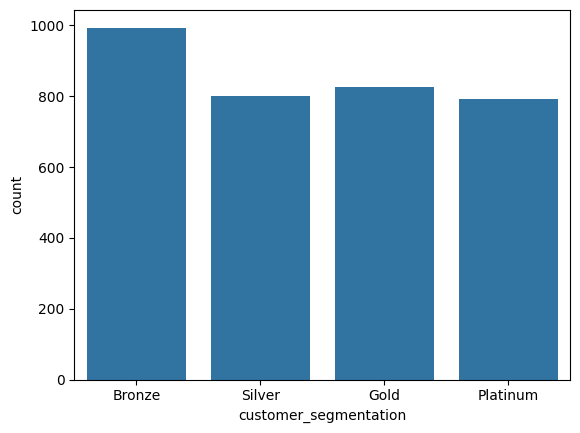

In [78]:
sns.countplot(x = 'customer_segmentation', data = rfm_table)